In [ ]:
!pip install --upgrade diffusers[torch]==0.27.2
!pip install transformers scipy ftfy accelerate
!pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [ ]:
#GPU is needed to run this
#before running this, select a T4 GPU at "Change runtime type"
#it can be found clicking in the arrow (pointing down) in the top right of the screen.

import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image
from google.colab import drive
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from diffusers import UniPCMultistepScheduler
import os
from glob import glob

In [ ]:
#here there was a code snippet to generate an image of an astronaut riding a horse
#removed as it is not needed

In [ ]:
# Load the ControlNet model and pipeline
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


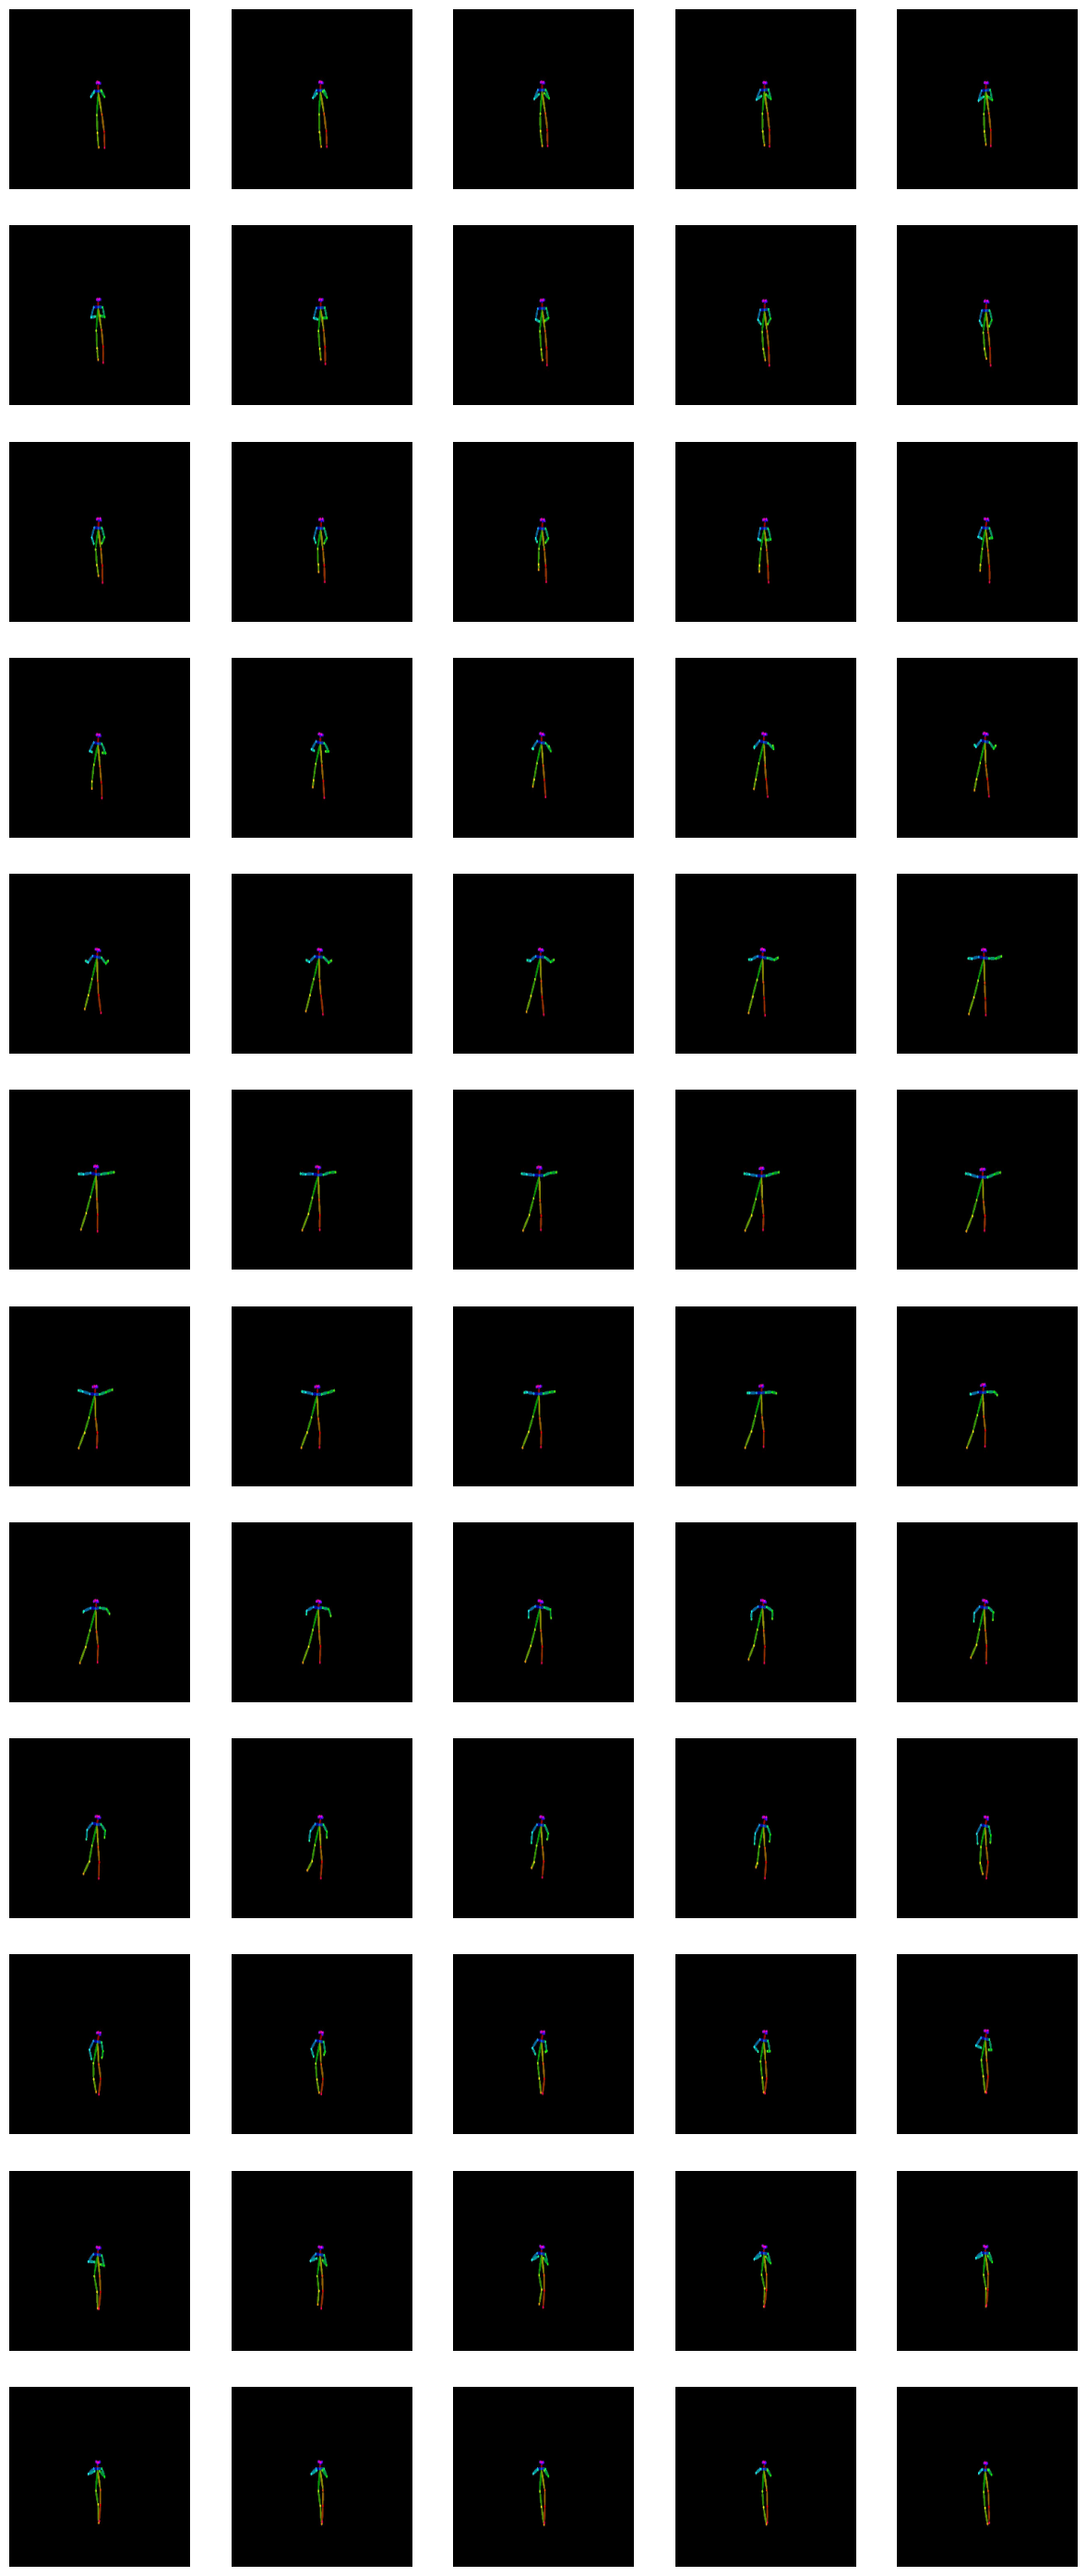

In [ ]:
# Path to the folder containing the npy files
folder_path = '/content/drive/MyDrive/Computer_Science/Poses_test'

# List all npy files in the folder
npy_files = sorted(glob(os.path.join(folder_path, '*.npy')))

# Check if npy_files is not empty
if not npy_files:
    raise ValueError("No npy files found in the specified folder.")

# Load the npy files as images
images = [np.load(file) for file in npy_files]

# Function to visualize images
def visualize_images(images, cols=5):
    if not images:
        raise ValueError("No images to display.")
    rows = (len(images) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    for i, image in enumerate(images):
        ax = axes[i // cols, i % cols]
        ax.imshow(image)
        ax.axis('off')
    plt.show()

# Visualize the loaded images
visualize_images(images)

def display_images_in_column(imgs):
    if not imgs:
        raise ValueError("No images to display.")
    for img in imgs:
        display(img)

  0%|          | 0/70 [00:00<?, ?it/s]

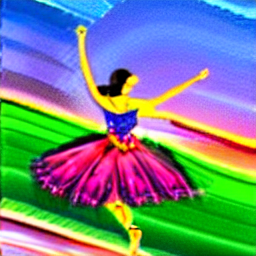

In [ ]:
# Step 1: Generate and Display the Initial High-Quality Image
initial_prompt = "one ballet dancer, realistic, high-quality, impressionist style"
negative_prompt = "monochrome, lowres, worst quality, low quality"
initial_seed = 40  # Changed the seed value
initial_generator = torch.Generator(device="cpu").manual_seed(initial_seed)

# Use the first pose image to generate the initial high-quality image
initial_pose_image = images[0]
initial_pose_image_pil = Image.fromarray(initial_pose_image)

high_quality_output = pipe(
    prompt=[initial_prompt],
    image=initial_pose_image_pil,
    negative_prompt=[negative_prompt],
    generator=initial_generator,
    num_inference_steps=70  # Increase steps for higher quality
)

# Display the high-quality image
high_quality_image = high_quality_output.images[0]
display(high_quality_image)

In [ ]:
# Step 2: Define Remaining Poses and Generators
remaining_poses = images[1:]
remaining_prompts = [initial_prompt for _ in remaining_poses]
remaining_generators = [torch.Generator(device="cpu").manual_seed(initial_seed) for _ in range(len(remaining_prompts))]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

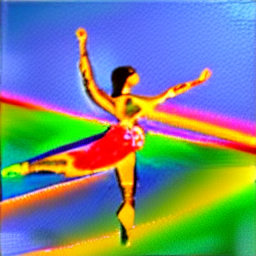

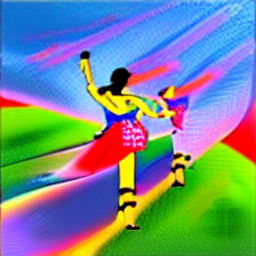

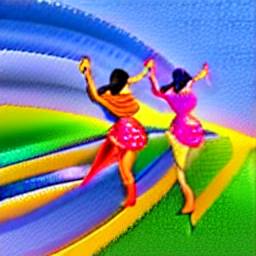

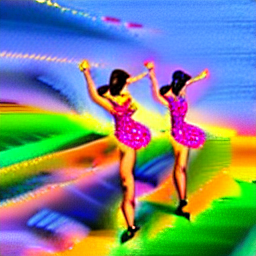

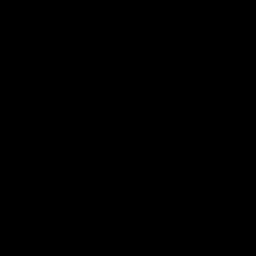

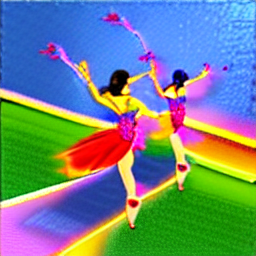

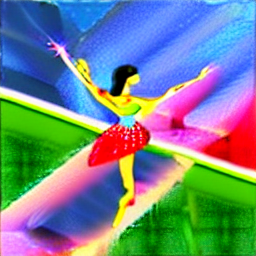

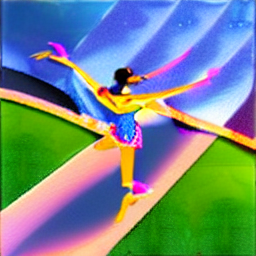

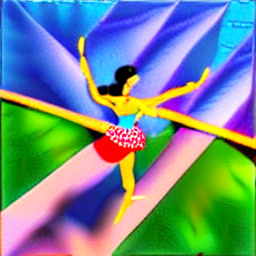

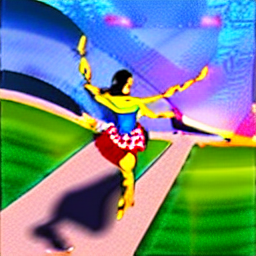

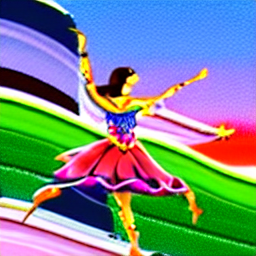

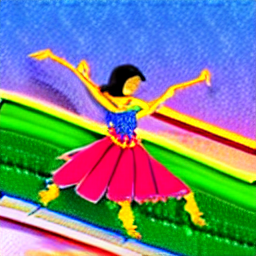

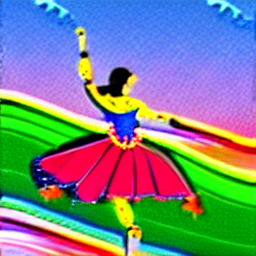

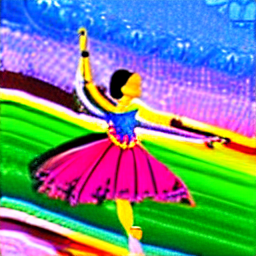

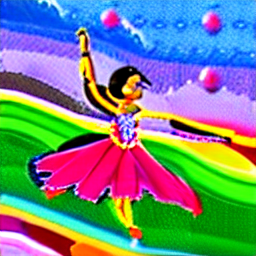

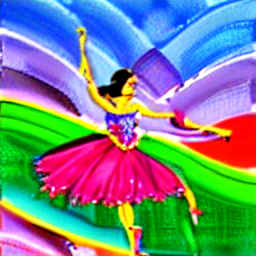

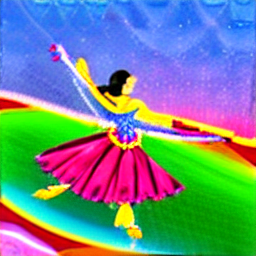

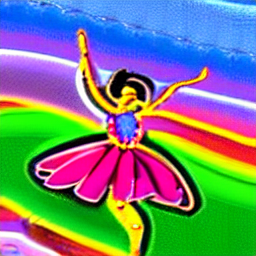

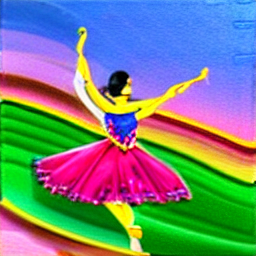

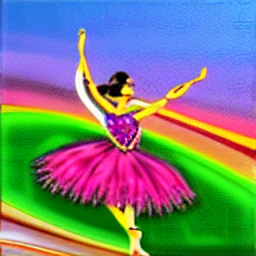

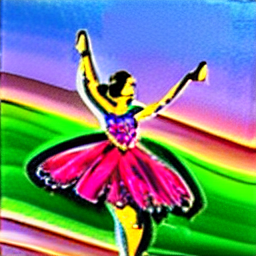

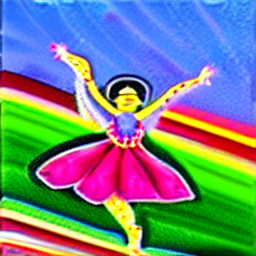

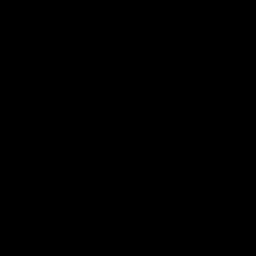

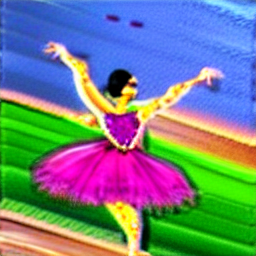

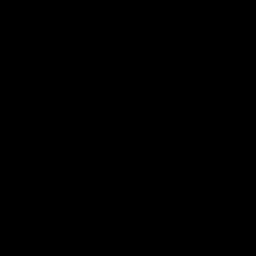

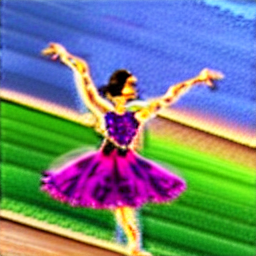

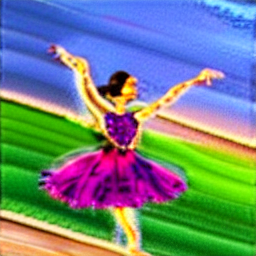

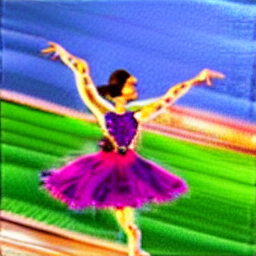

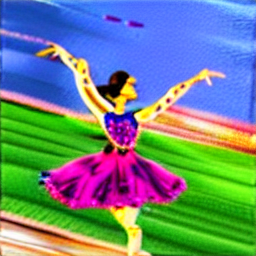

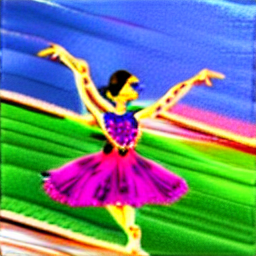

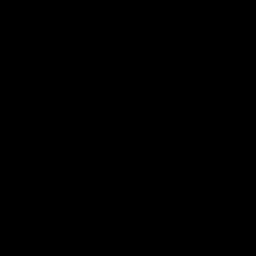

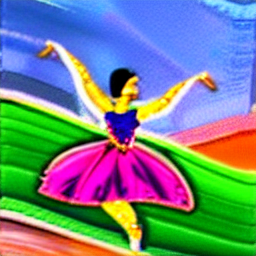

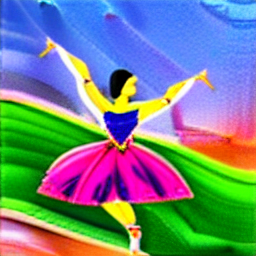

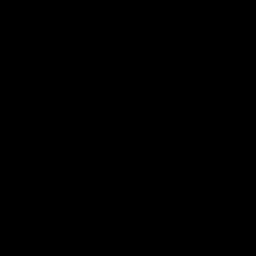

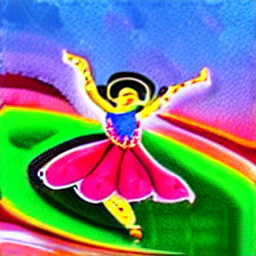

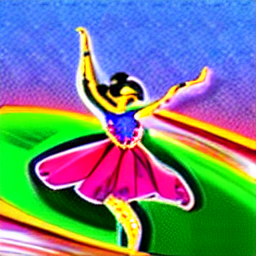

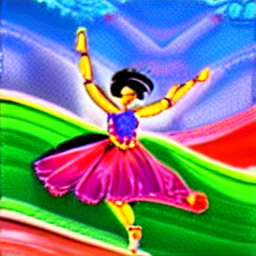

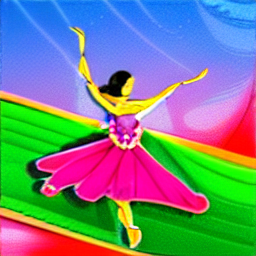

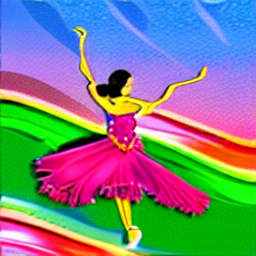

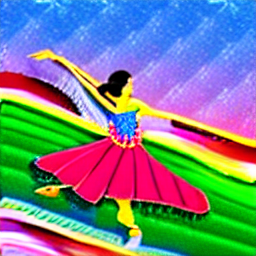

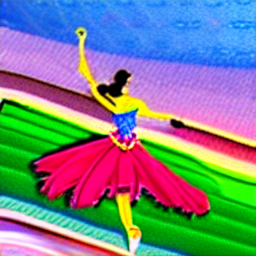

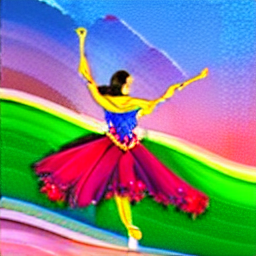

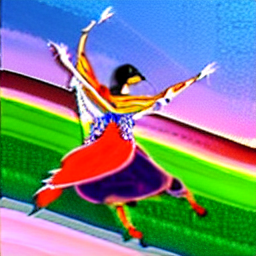

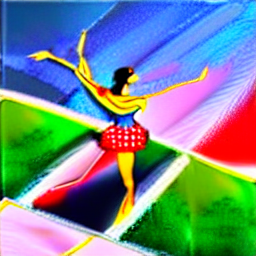

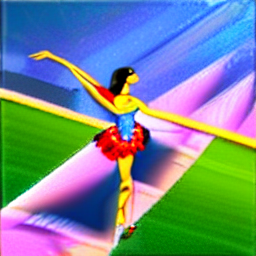

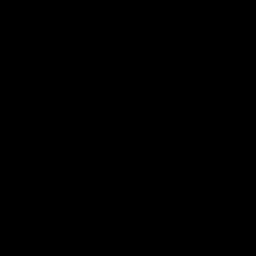

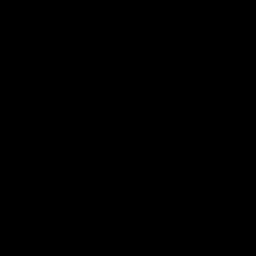

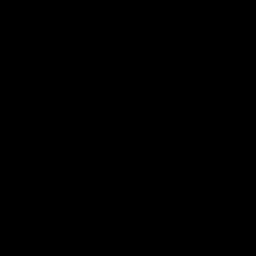

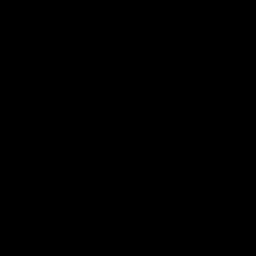

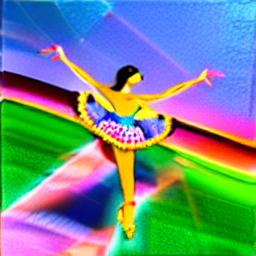

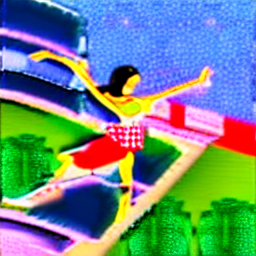

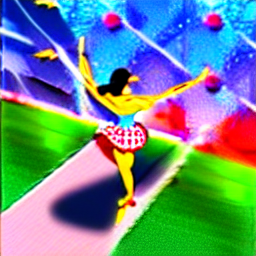

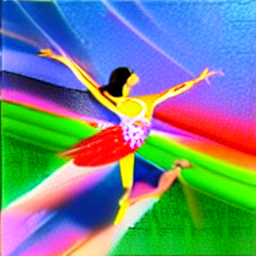

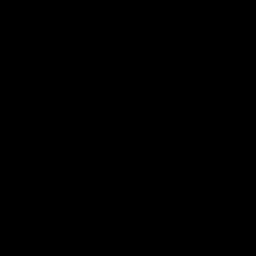

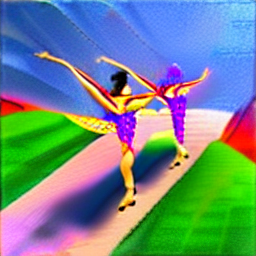

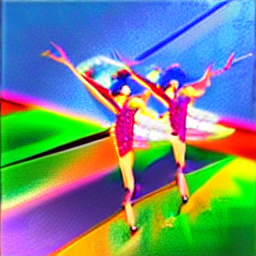

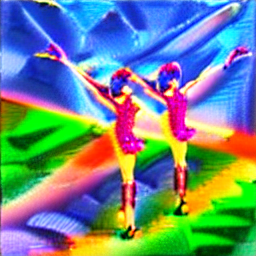

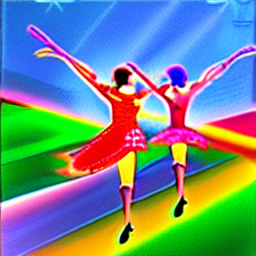

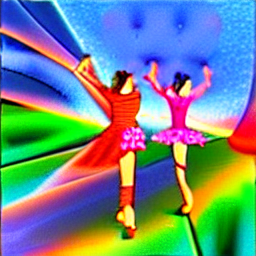

In [ ]:
remaining_images = []
for pose_image, new_generator in zip(remaining_poses, remaining_generators):
    pose_image_pil = Image.fromarray(pose_image)
    new_output = pipe(
        prompt=[initial_prompt],
        image=pose_image_pil,
        negative_prompt=[negative_prompt],
        generator=new_generator,
        num_inference_steps=20  # Adjust steps as needed
    )
    remaining_images.append(new_output.images[0])

# Display the remaining images in a single column
display_images_in_column(remaining_images)

In [30]:
import os

# Create a directory to save the images
save_dir = '/content/drive/MyDrive/Generated_Images'
os.makedirs(save_dir, exist_ok=True)

# Save each image in the directory
for i, img in enumerate(remaining_images):
    img.save(os.path.join(save_dir, f'image_{i:03d}.png'))

In [33]:
!pip install opencv-python

import cv2
import os

# Path to the directory with saved images
image_folder = '/content/drive/MyDrive/Computer_Science/Generated_Images'

# Path to save the video
video_path = '/content/drive/MyDrive/Computer_Science/Generated_Video/video.avi'

# Create the directory for the video if it does not exist
os.makedirs(os.path.dirname(video_path), exist_ok=True)

# Get the list of images
images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])
print(f"Found {len(images)} images to compile into a video.")

if images:
    # Determine the width and height from the first image
    first_image_path = os.path.join(image_folder, images[0])
    frame = cv2.imread(first_image_path)

    if frame is not None:
        height, width, layers = frame.shape
        print(f"Image dimensions: {width}x{height}")

        # Define the video codec and create a VideoWriter object
        video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'DIVX'), 10, (width, height))

        for image in images:
            img_path = os.path.join(image_folder, image)
            frame = cv2.imread(img_path)
            if frame is not None:
                video.write(frame)
            else:
                print(f"Warning: Skipping frame {img_path} because it could not be read.")

        cv2.destroyAllWindows()
        video.release()
        print(f"Video saved at {video_path}")
    else:
        print(f"Error: The first image at {first_image_path} could not be read.")
else:
    print("No images found in the specified folder.")

Found 59 images to compile into a video.
Image dimensions: 256x256
Video saved at /content/drive/MyDrive/Computer_Science/Generated_Video/video.avi
